In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("newfeatures_test14.csv")
dataset.shape


(273, 21)

In [2]:
features = ['y', 'new_t', 'payment', 'AlphaMax']

X = dataset[features]
y = dataset['newMark']
print(X)
print(y)

       y  new_t  payment  AlphaMax
0    0.9      0        8         3
1    0.9      0        7         3
2    0.9      0        7         3
3    0.9      2        6         6
4    0.9      3        5         6
..   ...    ...      ...       ...
268  0.1      2        2         3
269  0.1      0        2         3
270  0.1      1        2         3
271  0.1      0        2         3
272  0.1      0        2         3

[273 rows x 4 columns]
0      25.0
1      26.0
2      26.0
3      28.0
4      28.0
       ... 
268    21.0
269    23.0
270    22.0
271    23.0
272    23.0
Name: newMark, Length: 273, dtype: float64


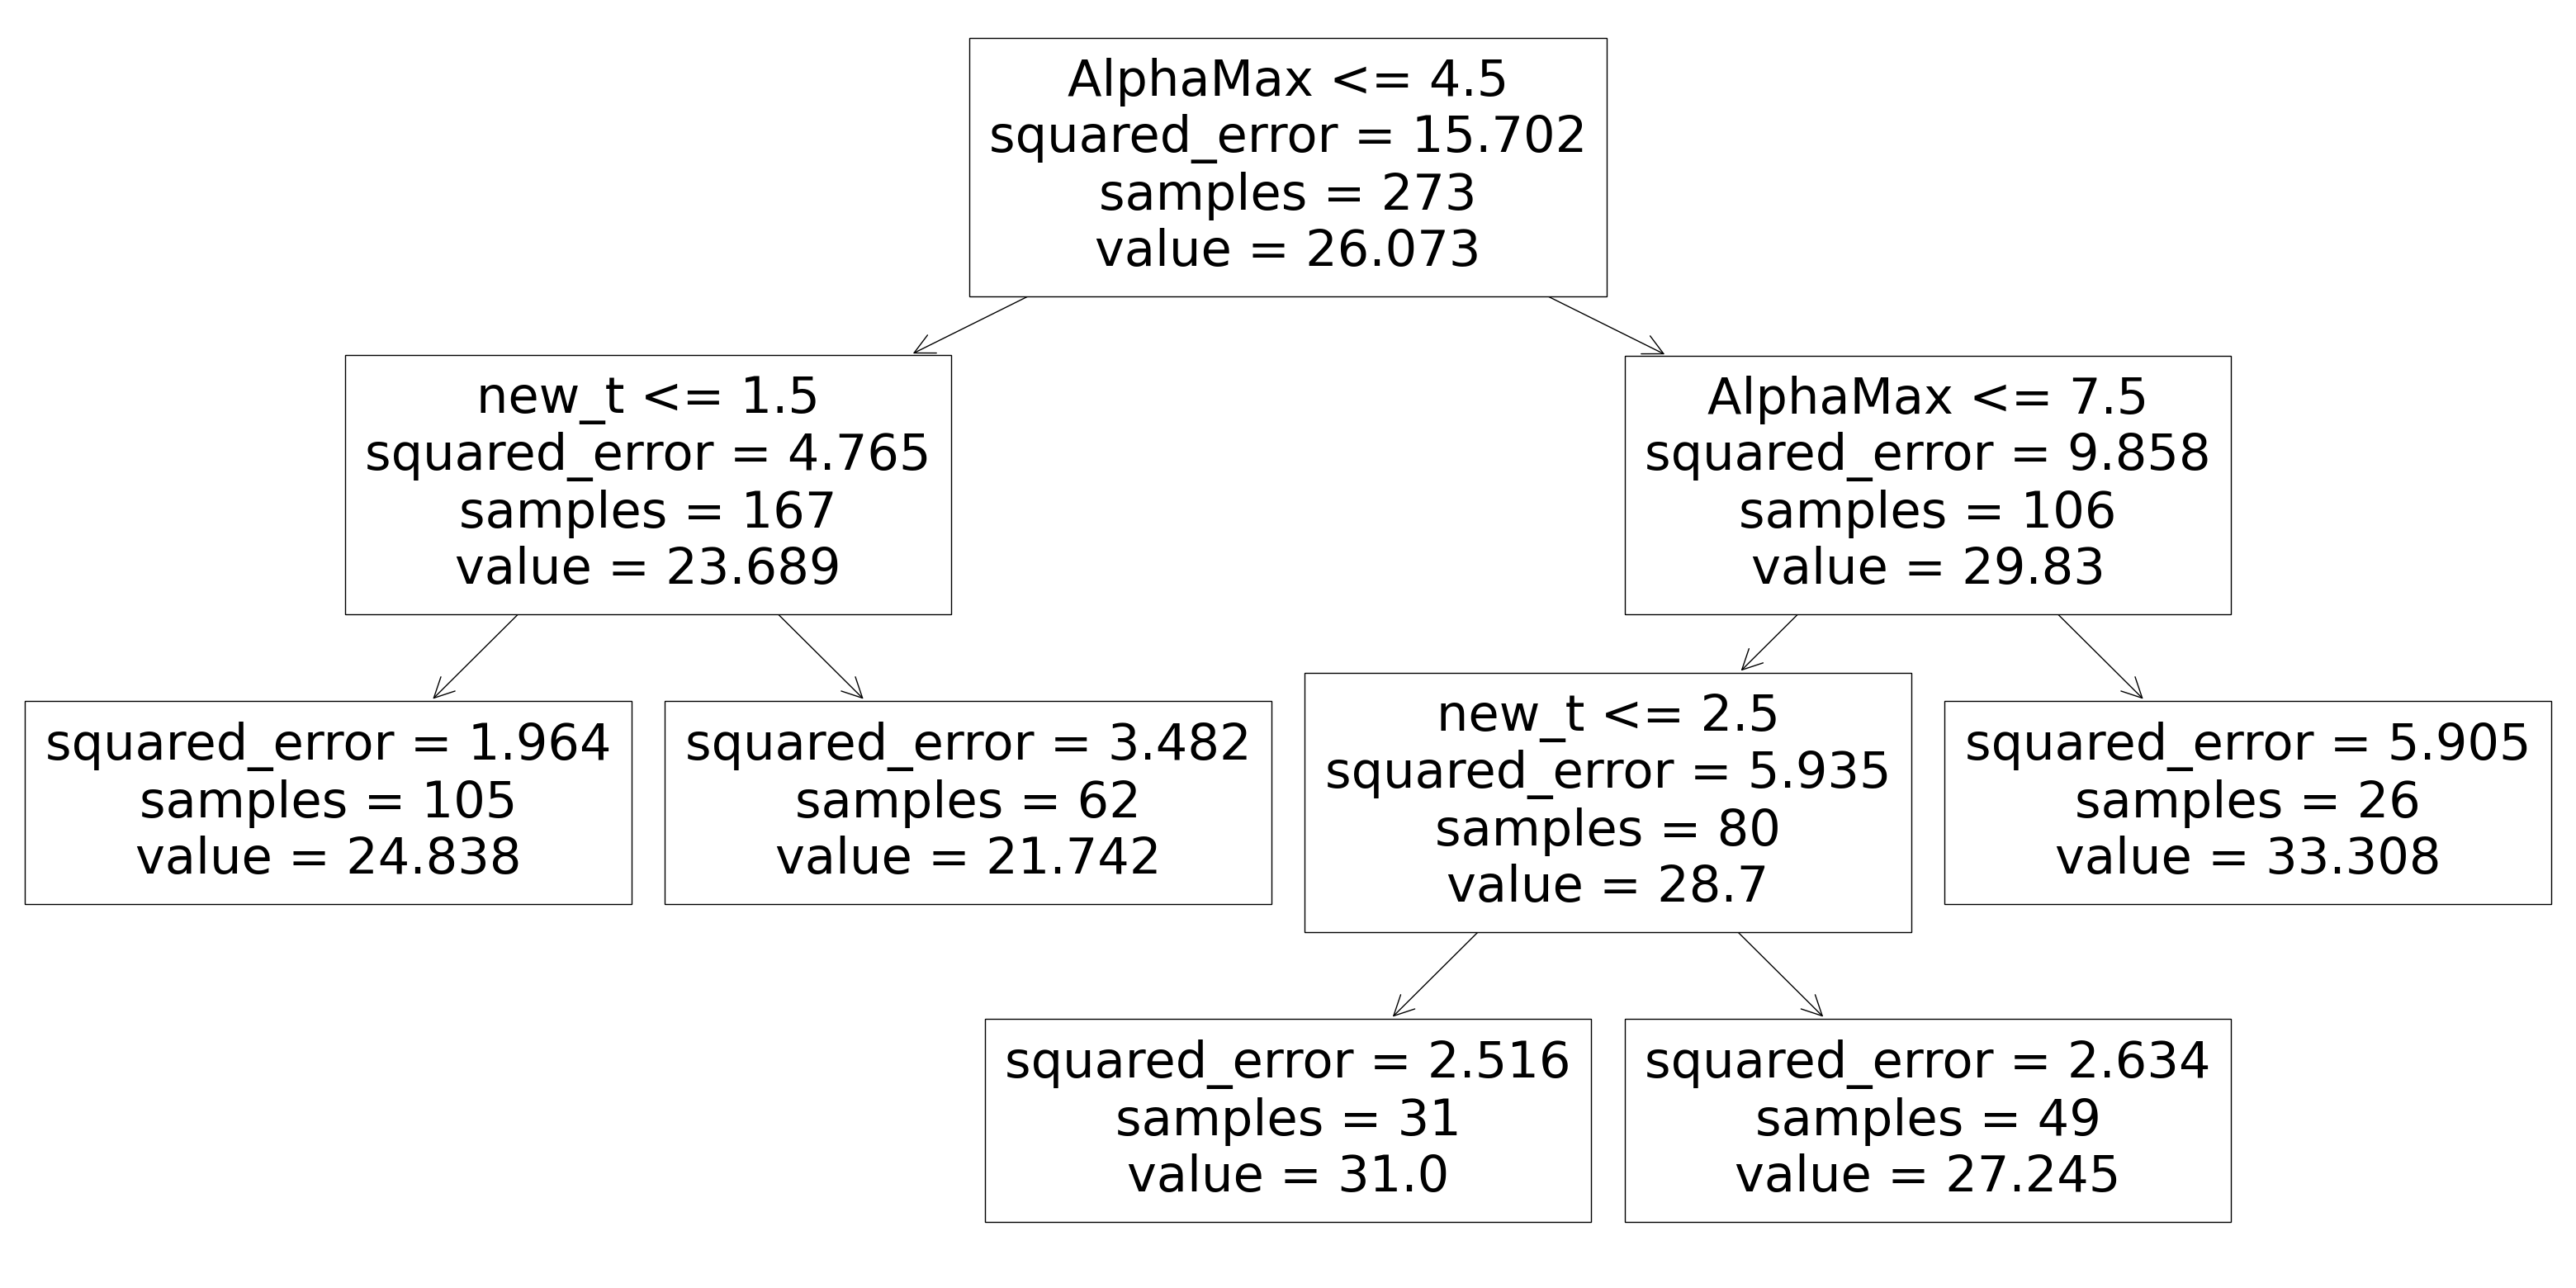

<Figure size 2400x1800 with 0 Axes>

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=None,max_leaf_nodes=5,criterion='squared_error')
regressor.fit(X, y)
tree.plot_tree(regressor,feature_names=features)
from matplotlib.pyplot import figure
# figure(figsize=(8, 6), dpi=300)
plt.rcParams['figure.figsize'] = [40, 20]
figure(figsize=(8, 6), dpi=300)
plt.savefig('hantree.png', dpi=300)

In [13]:
y_pred = regressor.predict(X)
print(y_pred)

[24.83809524 24.83809524 24.83809524 31.         27.24489796 27.24489796
 33.30769231 33.30769231 24.83809524 31.         24.83809524 27.24489796
 24.83809524 24.83809524 33.30769231 33.30769231 33.30769231 33.30769231
 33.30769231 33.30769231 33.30769231 33.30769231 27.24489796 27.24489796
 27.24489796 27.24489796 31.         31.         31.         27.24489796
 27.24489796 27.24489796 31.         31.         27.24489796 31.
 24.83809524 24.83809524 24.83809524 27.24489796 27.24489796 27.24489796
 27.24489796 27.24489796 27.24489796 24.83809524 27.24489796 24.83809524
 33.30769231 33.30769231 33.30769231 33.30769231 33.30769231 33.30769231
 33.30769231 33.30769231 27.24489796 27.24489796 27.24489796 27.24489796
 31.         31.         31.         27.24489796 27.24489796 27.24489796
 31.         31.         31.         31.         24.83809524 24.83809524
 24.83809524 24.83809524 24.83809524 27.24489796 27.24489796 24.83809524
 27.24489796 24.83809524 27.24489796 27.24489796 33.3076923

In [7]:
all_classes=regressor.apply(X, check_input=True)

In [8]:
X.iloc[32]

y           0.9
new_t       2.0
payment     3.0
AlphaMax    6.0
Name: 32, dtype: float64

In [9]:
all_classes

array([5, 5, 5, 7, 8, 8, 4, 4, 5, 7, 5, 8, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       8, 8, 8, 8, 7, 7, 7, 8, 8, 8, 7, 7, 8, 7, 5, 5, 5, 8, 8, 8, 8, 8,
       8, 5, 8, 5, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 7, 7, 7, 8, 8, 8,
       7, 7, 7, 7, 5, 5, 5, 5, 5, 8, 8, 5, 8, 5, 8, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5,
       5, 7, 7, 5, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 8, 8, 8, 8, 8, 7,
       7, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5], dtype=int64)

In [129]:
dict_tmp={}

dict_tmp['4']={}
dict_tmp['5']={}
dict_tmp['6']={}
dict_tmp['7']={}
dict_tmp['8']={}

for i in range(len(all_classes)):
    if all_classes[i] == 7:
        dict_tmp['7'][i]=all_classes[i]
    elif all_classes[i] == 8:
        dict_tmp['8'][i]=all_classes[i]
    elif all_classes[i] == 9:
        dict_tmp['9'][i]=all_classes[i]
    elif all_classes[i] == 10:
        dict_tmp['10'][i]=all_classes[i]
    elif all_classes[i] == 11:
        dict_tmp['11'][i]=all_classes[i]
    elif all_classes[i] == 12:
        dict_tmp['12'][i]=all_classes[i] 
    elif all_classes[i] == 13:
        dict_tmp['13'][i]=all_classes[i]
    elif all_classes[i] == 14:
        dict_tmp['14'][i]=all_classes[i]  
    elif all_classes[i] == 15:
        dict_tmp['15'][i]=all_classes[i]    
# for i in range(len(all_classes)):
#     if all_classes[i] == 3:
#         dict_tmp['3'].append((i,all_classes[i]))


In [130]:

i7 =np.array(list(dict_tmp['7'].keys()))
i8 =np.array(list(dict_tmp['8'].keys()))
i9 =np.array(list(dict_tmp['9'].keys()))
i10 =np.array(list(dict_tmp['10'].keys()))
i11 =np.array(list(dict_tmp['11'].keys()))
i12 =np.array(list(dict_tmp['12'].keys()))
i13 =np.array(list(dict_tmp['13'].keys()))
i14 =np.array(list(dict_tmp['14'].keys()))

In [131]:
i4[0]

6

In [100]:
np.mean(X.iloc[i1])

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


y           0.422754
new_t       1.514970
payment     3.023952
AlphaMax    3.000000
dtype: float64

In [18]:
np.std(X.iloc[i6])

y           0.170335
new_t       1.525793
payment     1.147771
AlphaMax    0.000000
dtype: float64

In [19]:
np.std(y_pred[i4])

0.0

میانگین و انحراف معیار مارک

In [20]:
np.mean(y.iloc[i4])

33.30769230769231

In [21]:
np.std(y.iloc[i7])

1.5862310778250641

In [22]:
X.iloc[i6]

,y,new_t,payment,AlphaMax
97,0.7,5,3,3
98,0.7,4,3,3
99,0.7,3,3,3
104,0.6,2,6,3
122,0.6,6,2,3
...,...,...,...,...
261,0.1,5,1,3
262,0.1,4,1,3
263,0.1,3,1,3
264,0.1,2,1,3


In [151]:
mean_ = np.mean(y.iloc[i9])
sum_2 = 0
for i in y.iloc[i9]:
    sum_2 += (i - mean_)**2
sum_2    

23.0

In [152]:
mean_ = np.mean(y.iloc[i13])
sum_3 = 0
for i in y.iloc[i13]:
    sum_3 += (i - mean_)**2
sum_3

77.08571428571415

In [153]:
mean_ = np.mean(y.iloc[i11])
sum_4 = 0
for i in y.iloc[i11]:
    sum_4 += (i - mean_)**2
sum_4

124.67307692307692

In [154]:
mean_ = np.mean(y.iloc[i7])
sum_5 = 0
for i in y.iloc[i7]:
    sum_5 += (i - mean_)**2
sum_5

78.0

In [155]:
mean_ = np.mean(y.iloc[i8])
sum_6 = 0
for i in y.iloc[i8]:
    sum_6 += (i - mean_)**2
sum_6

129.06122448979596

In [156]:
mean_ = np.mean(y.iloc[i10])
sum_7 = 0
for i in y.iloc[i10]:
    sum_7 += (i - mean_)**2
sum_7

23.428571428571427

In [157]:
mean_ = np.mean(y.iloc[i12])
sum_8 = 0
for i in y.iloc[i12]:
    sum_8 += (i - mean_)**2
sum_8

20.099999999999998

In [158]:
mean_ = np.mean(y.iloc[i14])
sum_9 = 0
for i in y.iloc[i14]:
    sum_9 += (i - mean_)**2
sum_9

71.54285714285712

In [159]:
sum_kol = sum_2 + sum_3 + sum_4 + sum_5 + sum_6 + sum_7 + sum_8 + sum_9
sum_kol

546.8914442700157

In [91]:
mean_ = np.mean(y)
sum_ =0
for i in y:
    sum_ += (i - mean_)**2
sum_    

4286.534798534791